In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(sns.__version__)
covid_df = pd.read_csv('data/covid_df.csv', sep=',')
covid_df['date'] = pd.to_datetime(covid_df['date'])
#Если импорт прошёл успешно, вы увидите на экране вашу версию библиотеки. Теперь можно начинать работу!

0.13.2


В данном разделе мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный DataFrame croped_covid_df для этих данных.

Для фильтрации по списку значений используем метод isin(), который проверяет, есть ли запись в столбце в переданном в метод списке. В результате возвращается привычная нам маска.

In [39]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


Начнём с гистограммы. Для визуализации гистограмм в библиотеке Seaborn используется метод histplot().

У данного метода (как и у всех методов библиотеки Seaborn) огромнейшее количество параметров. Мы приведём лишь основные.

# Основные параметры метода histplot()
data — DataFrame, по которому строится график;

x — признак, который будет отложен по оси абсцисс;

y — признак, который будет отложен по оси ординат;

hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);

ax — система координат Matplotlib, в которой строится график;

color — цвет графика;

bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);

kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

Построим сразу две гистограммы: одна будет иллюстрировать общее распределение ежедневной заболеваемости (daily_confirmed), а вторая — то же распределение в разрезе стран. 

Для этого создаём две координатные плоскости с помощью метода subplots(). 

На первой координатной плоскости рисуем простую гистограмму с 25 столбцами, а также добавим на неё сглаживающую кривую. 

На второй гистограмме добавляем параметр названия страны по оси y. В таком случае количество наблюдений будет обозначаться на диаграмме яркостью цвета (чем темнее полоса, тем больше наблюдений находится в интервале).

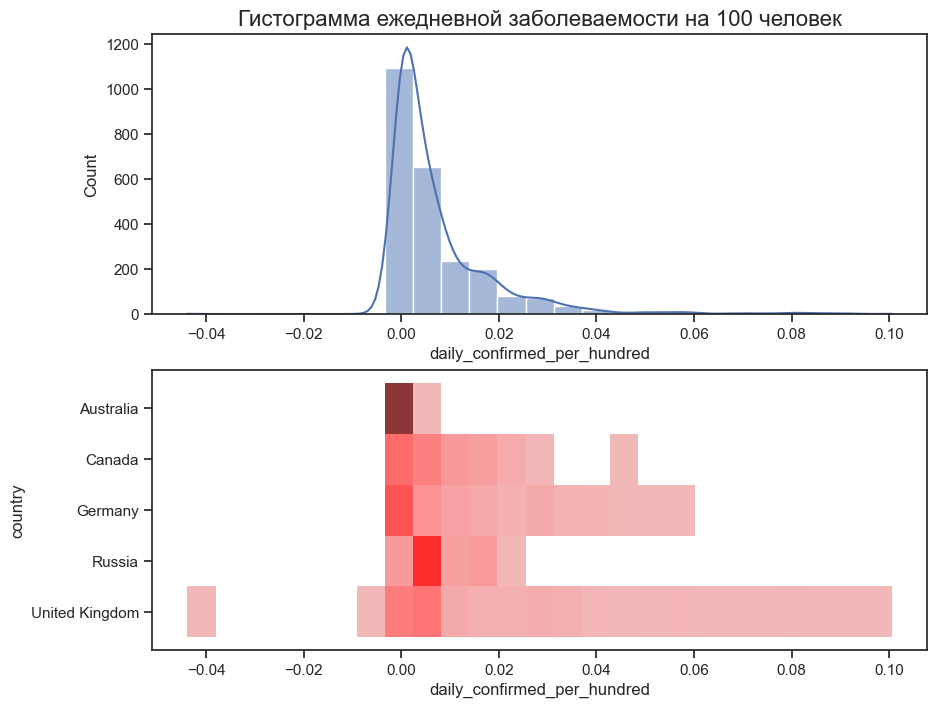

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

#На самом деле при использовании Seaborn необязательно передавать координатные плоскости в аргументы функций. 
#Графики в библиотеке вполне себе самодостаточны: функции для построения графика возвращают объект Axes из библиотеки Matplotlib, с которыми мы уже умеем работать.
# Достаточно просто занести результат выполнения функции в переменную и использовать её для настройки графика.

# Рассмотрим пример — построим коробчатые диаграммы признака летальности (death_rate), который вы создавали ранее в задании 3.3.

Коробчатые диаграммы в Seaborn строятся с помощью метода boxplot().

Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y — страны), параметр orient отвечает за ориентацию диаграммы, а width — за ширину коробок:

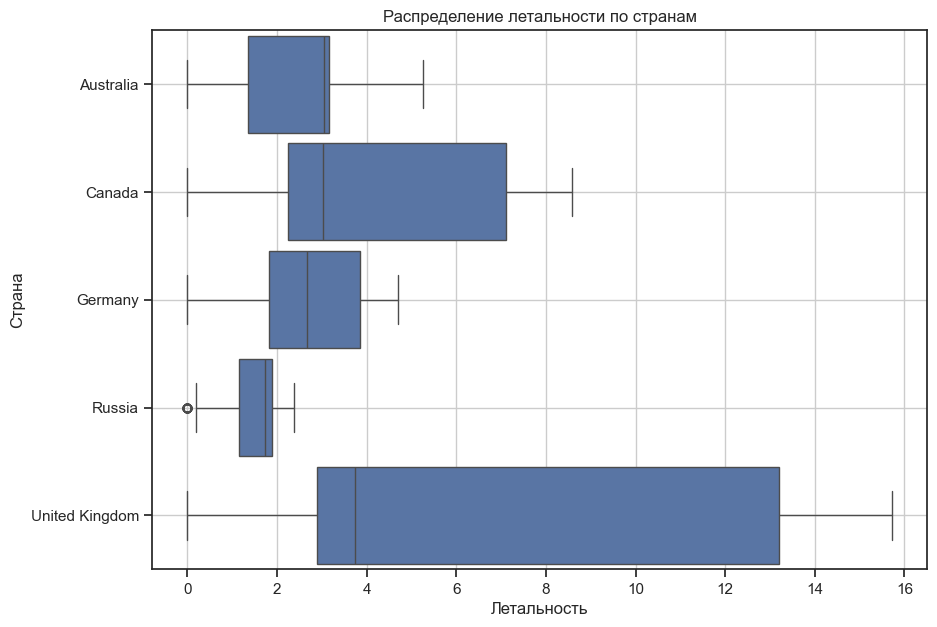

In [41]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

# Теперь рассмотрим пример многоуровневой столбчатой диаграммы. С помощью неё мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в Seaborn используется метод barplot(). По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задаётся в параметре estimator). Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку:

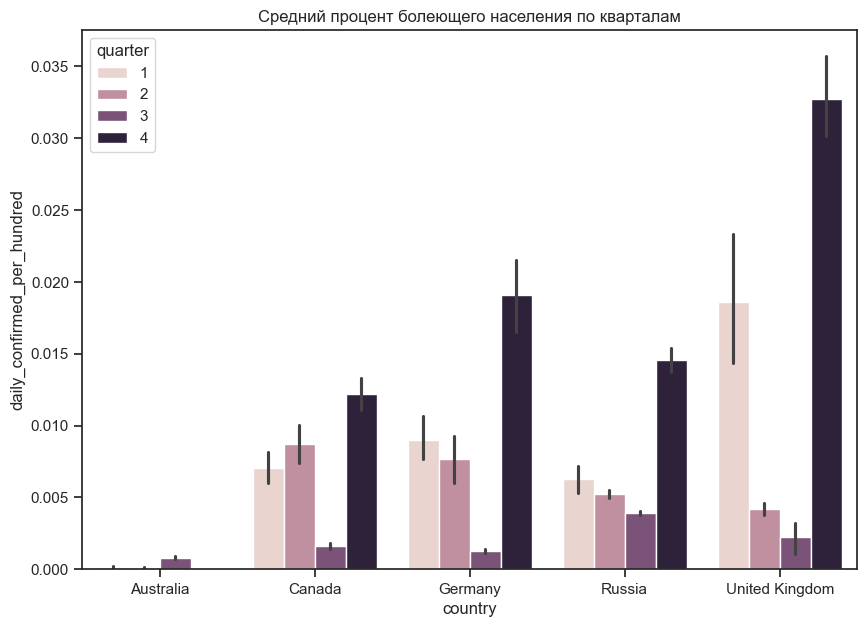

In [42]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

# Построим один из самых любимых дата-сайентистами графиков — jointplot() — в котором совмещены диаграмма рассеяния и гистограмма.

Это довольно удобный и полезный инструмент, когда мы хотим одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.

Построим jointplot зависимости ежедневной заболеваемости в странах от общей численности населения в процентах (daily_confirmed_per_hundred) от числа полностью вакцинированных в процентах (people_fully_vaccinated_per_hundred).

Параметры xlim и ylim определяют диапазон отображения осей x и y. Параметр height отвечает за высоту и ширину графика (он квадратный).

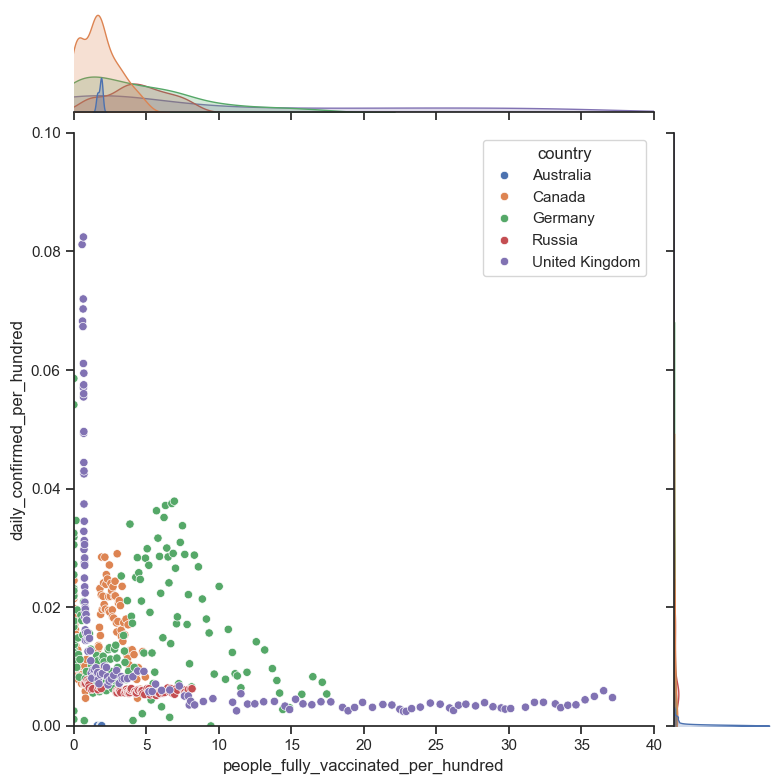

In [43]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

# Допустим, мы хотим сравнить темпы вакцинации по странам во времени. 

Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string.

In [44]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


In [45]:
сroped_covid_df = croped_covid_df.to_csv('data/сroped_covid_df.csv', index=False, sep = ',')

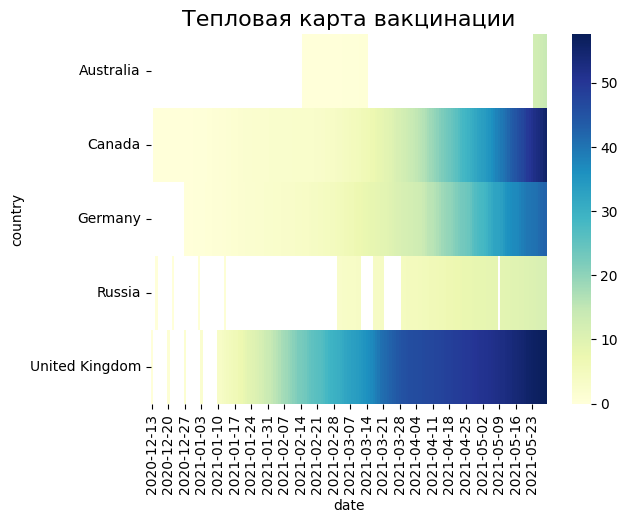

In [29]:
#Для построения тепловой карты в Seaborn используется метод heatmap(). 
#Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. 
#Параметр annot отвечает за отображение легенды (аннотации), параметр cmap — за цветовую гамму графика.

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

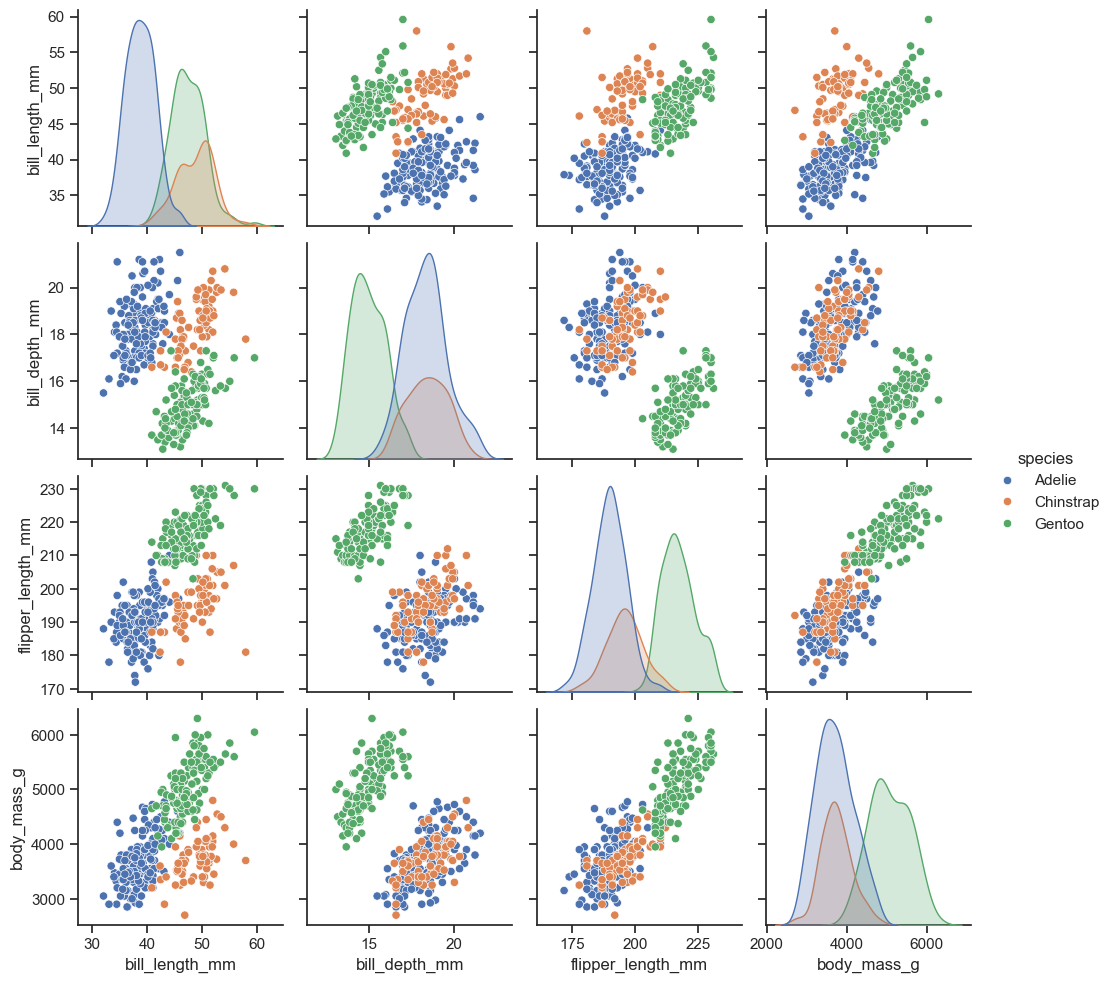

In [46]:
#Задание 6.1 Найдите в документации по библиотеке Seaborn название графика, 
# который позволяет строить матрицу из диаграмм рассеяния для всех пар числовых признаков, а на диагонали этой матрицы отображаются гистограммы.
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

<Axes: xlabel='country', ylabel='people_vaccinated_per_hundred'>

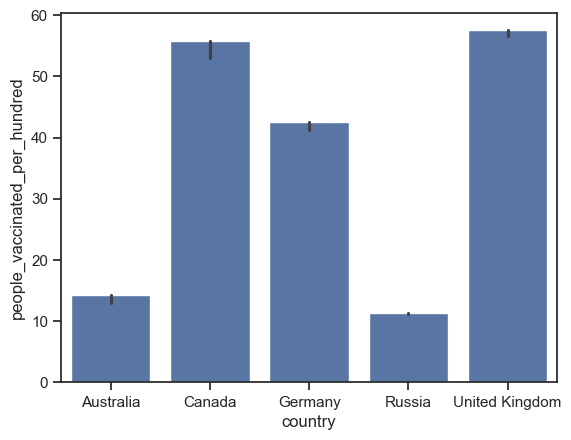

In [47]:
sns.barplot(
    data=croped_covid_df,
    x='country',
    y='people_vaccinated_per_hundred',
    estimator=max
)

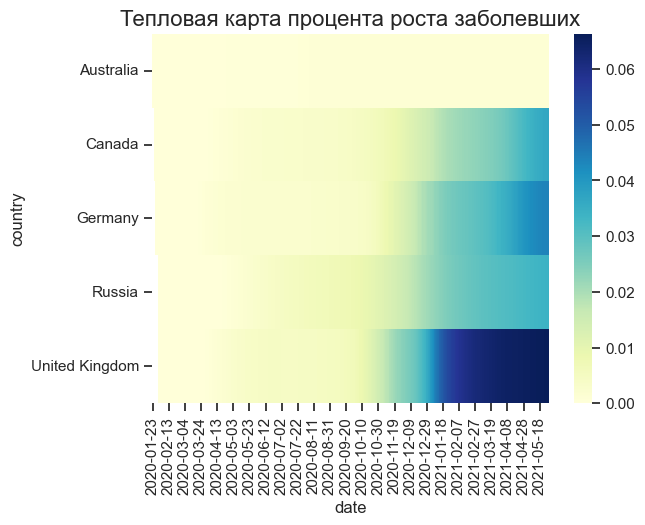

In [68]:
#Задание 6.4 Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ().
#Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population']
tab1 = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
tab1.columns = tab1.columns.astype('string')
heatmap1 = sns.heatmap(data=tab1, cmap='YlGnBu')
heatmap1.set_title('Тепловая карта процента роста заболевших', fontsize=16);

In [ ]:
#Задание 6.4 - решеине ментора
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)

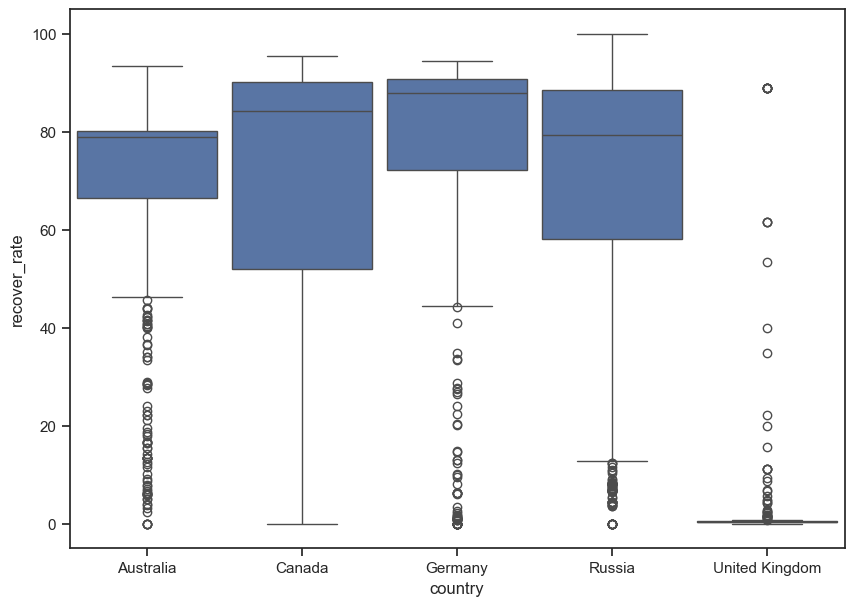

In [69]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.9
)